In [4]:
import sys
import numpy as np
import iminuit
from iminuit import Minuit
import matplotlib.pyplot as plt
import os
os.environ['CLMM_MODELING_BACKEND'] = 'nc'
import clmm
from clmm import Cosmology
from astropy.table import Table, QTable, hstack, vstack
import pyccl as ccl
from astropy.cosmology import FlatLambdaCDM
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)
cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)
cosmo_ccl  = ccl.Cosmology(Omega_c=0.265-0.0448, Omega_b=0.0448, h=0.71, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)
import emcee

#import CL_WL_miscentering as mis
import mcmc
import CL_WL_two_halo_term as twoh
import CL_WL_mass_conversion as utils

#ccl m-c relations
deff = ccl.halos.massdef.MassDef(200, 'critical', c_m_relation=None)
concDiemer15 = ccl.halos.concentration.ConcentrationDiemer15(mdef=deff)
concDuffy08 = ccl.halos.concentration.ConcentrationDuffy08(mdef=deff)
concPrada12 = ccl.halos.concentration.ConcentrationPrada12(mdef=deff)
concBhattacharya13 = ccl.halos.concentration.ConcentrationBhattacharya13(mdef=deff)

#ccl halo bias
definition = ccl.halos.massdef.MassDef(200, 'matter', c_m_relation=None)
halobias = ccl.halos.hbias.HaloBiasTinker10(cosmo_ccl, mass_def=definition, mass_def_strict=True)


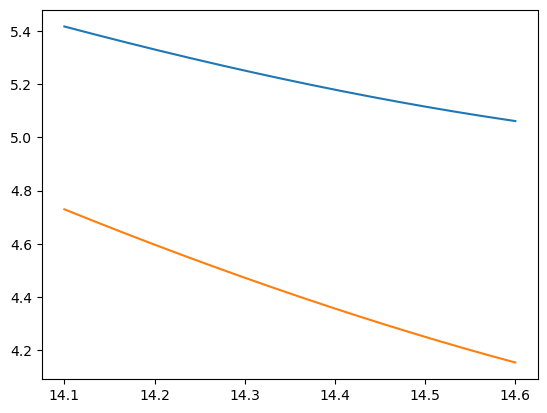

In [11]:

logm_array = np.linspace(14.1, 14.6, 200)
c_array = concPrada12._concentration(cosmo_ccl, 10**logm_array, 1./(1. + .4))
plt.plot(logm_array, c_array)
c_array = concDiemer15._concentration(cosmo_ccl, 10**logm_array, 1./(1. + .4))
plt.plot(logm_array, c_array)

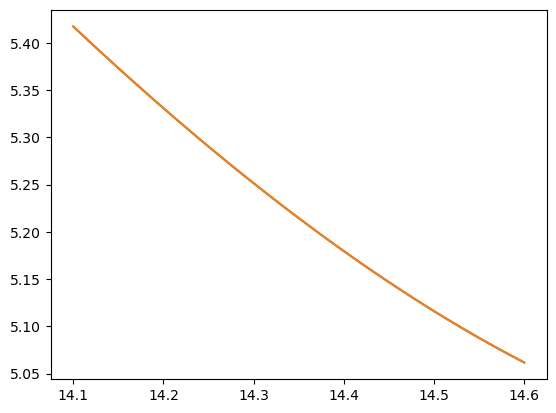

In [10]:
plt.plot(logm_array, c_array)
plt.plot(logm_array, c200c(logm_array))